In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statistics

from sklearn.linear_model import LinearRegression, Lasso, LassoCV

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, RandomForestClassifier, ExtraTreesClassifier, AdaBoostRegressor, GradientBoostingRegressor, AdaBoostClassifier, GradientBoostingClassifier, BaggingRegressor, BaggingClassifier

pd.options.display.float_format = '{:,.2f}'.format
pd.pandas.set_option('display.max_rows', None)
pd.pandas.set_option('display.max_columns', None)
import time

In [29]:
df = pd.read_csv('./Data/imputed.csv')


####  Read the inflation adjustment Consumer Price Index for All Urban Consumers (CPI-U) file to get the CPI  for adjusting budget and gross

In [30]:
file = '../Project4/Data/SeriesReport-20240509191709_137c61.xlsx'

bls = pd.read_excel(io = file)

C:\Users\david\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [31]:
df.head(2)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,month,rating_imputed,budget_imputed
0,The Shining,4.00,Drama,1980,8.40,"927,000.00",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,"19,000,000.00","46,998,772.00",Warner Bros.,146.00,June,0,0
1,The Blue Lagoon,4.00,Adventure,1980,5.80,"65,000.00",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,"4,500,000.00","58,853,106.00",Columbia Pictures,104.00,July,0,0


In [32]:
df.shape

(7475, 17)

In [33]:
df.isnull().sum()

name              0
rating            0
genre             0
year              0
score             0
votes             0
director          0
writer            0
star              0
country           0
budget            0
gross             0
company           0
runtime           0
month             0
rating_imputed    0
budget_imputed    0
dtype: int64

In [34]:
df.dtypes

name               object
rating            float64
genre              object
year                int64
score             float64
votes             float64
director           object
writer             object
star               object
country            object
budget            float64
gross             float64
company            object
runtime           float64
month              object
rating_imputed      int64
budget_imputed      int64
dtype: object

In [35]:
bls.shape

(53, 15)

In [36]:
bls.head()

,Consumer Price Index for All Urban Consumers (CPI-U),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Original Data Value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Series Id:,CUUR0000SA0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Not Seasonally Adjusted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Series Title:,"All items in U.S. city average, all urban cons...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# Get all the rows since 1980
since80 = bls[11:]
since80.head()

,Consumer Price Index for All Urban Consumers (CPI-U),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
11,1980,77.80,78.90,80.10,81,81.80,82.70,82.70,83.30,84,84.80,85.50,86.30,NaN,NaN
12,1981,87,87.90,88.50,89.10,89.80,90.60,91.60,92.30,93.20,93.40,93.70,94,NaN,NaN
13,1982,94.30,94.60,94.50,94.90,95.80,97,97.50,97.70,97.90,98.20,98,97.60,NaN,NaN
14,1983,97.80,97.90,97.90,98.60,99.20,99.50,99.90,100.20,100.70,101,101.20,101.30,NaN,NaN
15,1984,101.90,102.40,102.60,103.10,103.40,103.70,104.10,104.50,105,105.30,105.30,105.30,102.90,104.90


In [38]:
type(bls)

pandas.core.frame.DataFrame

In [39]:
# Row 10 is the column names
cols = bls.iloc[10]
cols

Consumer Price Index for All Urban Consumers (CPI-U)     Year
Unnamed: 1                                                Jan
Unnamed: 2                                                Feb
Unnamed: 3                                                Mar
Unnamed: 4                                                Apr
Unnamed: 5                                                May
Unnamed: 6                                                Jun
Unnamed: 7                                                Jul
Unnamed: 8                                                Aug
Unnamed: 9                                                Sep
Unnamed: 10                                               Oct
Unnamed: 11                                               Nov
Unnamed: 12                                               Dec
Unnamed: 13                                             HALF1
Unnamed: 14                                             HALF2
Name: 10, dtype: object

In [40]:
# Get all the rows since 1980
since80 = bls[11:]
since80.head()

,Consumer Price Index for All Urban Consumers (CPI-U),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
11,1980,77.80,78.90,80.10,81,81.80,82.70,82.70,83.30,84,84.80,85.50,86.30,NaN,NaN
12,1981,87,87.90,88.50,89.10,89.80,90.60,91.60,92.30,93.20,93.40,93.70,94,NaN,NaN
13,1982,94.30,94.60,94.50,94.90,95.80,97,97.50,97.70,97.90,98.20,98,97.60,NaN,NaN
14,1983,97.80,97.90,97.90,98.60,99.20,99.50,99.90,100.20,100.70,101,101.20,101.30,NaN,NaN
15,1984,101.90,102.40,102.60,103.10,103.40,103.70,104.10,104.50,105,105.30,105.30,105.30,102.90,104.90


In [41]:
since80 = since80.rename(columns = cols)
since80.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2
11,1980,77.80,78.90,80.10,81,81.80,82.70,82.70,83.30,84,84.80,85.50,86.30,NaN,NaN
12,1981,87,87.90,88.50,89.10,89.80,90.60,91.60,92.30,93.20,93.40,93.70,94,NaN,NaN
13,1982,94.30,94.60,94.50,94.90,95.80,97,97.50,97.70,97.90,98.20,98,97.60,NaN,NaN
14,1983,97.80,97.90,97.90,98.60,99.20,99.50,99.90,100.20,100.70,101,101.20,101.30,NaN,NaN
15,1984,101.90,102.40,102.60,103.10,103.40,103.70,104.10,104.50,105,105.30,105.30,105.30,102.90,104.90


In [42]:
since80 = since80.drop(columns = ['HALF1', 'HALF2'])

In [43]:
since80.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
11,1980,77.80,78.90,80.10,81,81.80,82.70,82.70,83.30,84,84.80,85.50,86.30
12,1981,87,87.90,88.50,89.10,89.80,90.60,91.60,92.30,93.20,93.40,93.70,94
13,1982,94.30,94.60,94.50,94.90,95.80,97,97.50,97.70,97.90,98.20,98,97.60
14,1983,97.80,97.90,97.90,98.60,99.20,99.50,99.90,100.20,100.70,101,101.20,101.30
15,1984,101.90,102.40,102.60,103.10,103.40,103.70,104.10,104.50,105,105.30,105.30,105.30


In [44]:
# Need to map month names so when we match it to the clean.csv, it can match on month and year
month_map = {'Jan' : 'January',
            'Feb' : 'February', 
            'Mar' : 'March',
            'Apr' : 'April',
            'May' : 'May', 
            'Jun' : 'June',
            'Jul' : 'July',
            'Aug' : 'August',
            'Sep' : 'September',
            'Oct' : 'October',
            'Nov' : 'November',
            'Dec' : 'December'}

In [45]:
since80.rename(mapper = month_map, axis = 1, inplace = True)

In [46]:
since80.head(1)

,Year,January,February,March,April,May,June,July,August,September,October,November,December
11,1980,77.80,78.90,80.10,81,81.80,82.70,82.70,83.30,84,84.80,85.50,86.30


In [47]:
since80.set_index('Year', inplace = True)
since80.head(3)

,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
1980,77.80,78.90,80.10,81,81.80,82.70,82.70,83.30,84,84.80,85.50,86.30
1981,87,87.90,88.50,89.10,89.80,90.60,91.60,92.30,93.20,93.40,93.70,94
1982,94.30,94.60,94.50,94.90,95.80,97,97.50,97.70,97.90,98.20,98,97.60


In [59]:
since80.tail()

,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2017,242.84,243.60,243.80,244.52,244.73,244.96,244.79,245.52,246.82,246.66,246.67,246.52
2018,247.87,248.99,249.55,250.55,251.59,251.99,252.01,252.15,252.44,252.88,252.04,251.23
2019,251.71,252.78,254.20,255.55,256.09,256.14,256.57,256.56,256.76,257.35,257.21,256.97
2020,257.97,258.68,258.12,256.39,256.39,257.80,259.10,259.92,260.28,260.39,260.23,260.47
2021,261.58,263.01,264.88,267.05,269.19,271.70,273.00,273.57,274.31,276.59,277.95,278.80


In [48]:
bls_dict = since80.to_dict()

In [49]:
#function to get inflation adjustment factor for each month of a year. We are considering Decemeber 2020 as reference year 

def get_inflation_adj_val(year, month):
    CPI_ref_year = bls_dict['December'][2020]
    CPI_base_year = bls_dict[month][year]
    Inflation_factor = CPI_ref_year/ bls_dict[month][year]                               
    return Inflation_factor

In [50]:
print(bls_dict['December'][2020])
print(bls_dict['July'][2018])
print((bls_dict['December'][2020])/(bls_dict['July'][2018]))

get_inflation_adj_val(2018, 'July')

260.474
252.006
1.0336023745466378


1.0336023745466378

In [63]:
bls_dict['December'][2020]/(bls_dict['June'][1980])

3.1496251511487303

In [51]:
#add inf_adjmnt_value column to the dataframe by  applying get_inflation_adj_val to each row of  the data frame  
df['inf_adjmnt_value'] = df.apply(lambda x: get_inflation_adj_val(x['year'], x['month']), axis=1)

In [52]:
df[['name','year','month','inf_adjmnt_value']].head(3)

,name,year,month,inf_adjmnt_value
0,The Shining,1980,June,3.15
1,The Blue Lagoon,1980,July,3.15
2,Star Wars: Episode V - The Empire Strikes Back,1980,June,3.15


In [61]:
df[df['year'] == 1983].head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,month,rating_imputed,budget_imputed,inf_adjmnt_value,budget_adj,gross_adj
304,Scarface,4.00,Crime,1983,8.30,"766,000.00",Brian De Palma,Oliver Stone,Al Pacino,United States,"25,000,000.00","65,884,703.00",Universal Pictures,170.00,December,0,0,2.57,"64,282,823.30","169,410,188.84"
305,The Outsiders,2.00,Crime,1983,7.10,"78,000.00",Francis Ford Coppola,Kathleen Rowell,C. Thomas Howell,United States,"10,000,000.00","25,697,647.00",Zoetrope Studios,91.00,March,0,0,2.66,"26,606,128.70","68,371,490.34"
306,Star Wars: Episode VI - Return of the Jedi,2.00,Action,1983,8.30,"973,000.00",Richard Marquand,Lawrence Kasdan,Mark Hamill,United States,"32,500,000.00","475,106,177.00",Lucasfilm,131.00,May,0,0,2.63,"85,336,743.95","1,247,508,128.51"
307,Risky Business,4.00,Comedy,1983,6.80,"83,000.00",Paul Brickman,Paul Brickman,Tom Cruise,United States,"6,200,000.00","63,541,777.00",The Geffen Company,99.00,August,0,0,2.60,"16,117,153.69","165,179,449.32"
308,National Lampoon's Vacation,4.00,Adventure,1983,7.40,"100,000.00",Harold Ramis,John Hughes,Chevy Chase,United States,"15,000,000.00","61,399,552.00",National Lampoon,98.00,July,0,0,2.61,"39,110,210.21","160,089,959.04"


In [53]:
df['budget_adj'] = df['budget']* df['inf_adjmnt_value']
df['gross_adj'] = df['gross']* df['inf_adjmnt_value']

In [54]:
df.head(5)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,month,rating_imputed,budget_imputed,inf_adjmnt_value,budget_adj,gross_adj
0,The Shining,4.00,Drama,1980,8.40,"927,000.00",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,"19,000,000.00","46,998,772.00",Warner Bros.,146.00,June,0,0,3.15,"59,842,877.87","148,028,514.36"
1,The Blue Lagoon,4.00,Adventure,1980,5.80,"65,000.00",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,"4,500,000.00","58,853,106.00",Columbia Pictures,104.00,July,0,0,3.15,"14,173,313.18","185,365,222.88"
2,Star Wars: Episode V - The Empire Strikes Back,2.00,Action,1980,8.70,"1,200,000.00",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,"18,000,000.00","538,375,067.00",Lucasfilm,124.00,June,0,0,3.15,"56,693,252.72","1,695,679,651.77"
3,Airplane!,2.00,Comedy,1980,7.70,"221,000.00",Jim Abrahams,Jim Abrahams,Robert Hays,United States,"3,500,000.00","83,453,539.00",Paramount Pictures,88.00,July,0,0,3.15,"11,023,688.03","262,847,365.39"
4,Caddyshack,4.00,Comedy,1980,7.30,"108,000.00",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,"6,000,000.00","39,846,344.00",Orion Pictures,98.00,July,0,0,3.15,"18,897,750.91","125,501,047.24"


In [58]:
df.tail()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,month,rating_imputed,budget_imputed,inf_adjmnt_value,budget_adj,gross_adj
7470,The Eight Hundred,6.00,Action,2020,6.80,"3,700.00",Hu Guan,Hu Guan,Zhi-zhong Huang,China,"80,000,000.00","461,421,559.00",Beijing Diqi Yinxiang Entertainment,149.00,August,0,0,1.00,"80,171,130.90","462,408,602.56"
7471,The Quarry,4.00,Crime,2020,5.40,"2,400.00",Scott Teems,Scott Teems,Shea Whigham,United States,"13,277,500.00","3,661.00",Prowess Pictures,98.00,April,0,1,1.02,"13,489,048.03","3,719.33"
7472,Tulsa,3.00,Comedy,2020,5.00,294.00,Scott Pryor,Scott Pryor,Scott Pryor,United States,"22,769,550.00","413,378.00",Pryor Entertainment,120.00,June,0,1,1.01,"23,005,992.18","417,670.57"
7473,Leap,1.00,Drama,2020,6.70,903.00,Peter Ho-Sun Chan,Ji Zhang,Gong Li,China,"42,354,500.00","25,818,882.00",We Pictures,135.00,September,0,1,1.00,"42,386,068.98","25,838,126.13"
7474,I Am Fear,6.00,Horror,2020,3.40,447.00,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,"14,842,150.00","13,266.00",Roxwell Films,87.00,March,0,1,1.01,"14,977,797.41","13,387.24"


In [55]:
df[['name', 'budget','budget_adj', 'year', 'month', 'gross','gross_adj']].head()

,name,budget,budget_adj,year,month,gross,gross_adj
0,The Shining,"19,000,000.00","59,842,877.87",1980,June,"46,998,772.00","148,028,514.36"
1,The Blue Lagoon,"4,500,000.00","14,173,313.18",1980,July,"58,853,106.00","185,365,222.88"
2,Star Wars: Episode V - The Empire Strikes Back,"18,000,000.00","56,693,252.72",1980,June,"538,375,067.00","1,695,679,651.77"
3,Airplane!,"3,500,000.00","11,023,688.03",1980,July,"83,453,539.00","262,847,365.39"
4,Caddyshack,"6,000,000.00","18,897,750.91",1980,July,"39,846,344.00","125,501,047.24"


In [64]:
df['profit'] = df['gross'] - df['budget']
df['profit_adj'] = df['gross_adj'] - df['budget_adj']

In [65]:
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,month,rating_imputed,budget_imputed,inf_adjmnt_value,budget_adj,gross_adj,profit,profit_adj
0,The Shining,4.00,Drama,1980,8.40,"927,000.00",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,"19,000,000.00","46,998,772.00",Warner Bros.,146.00,June,0,0,3.15,"59,842,877.87","148,028,514.36","27,998,772.00","88,185,636.49"
1,The Blue Lagoon,4.00,Adventure,1980,5.80,"65,000.00",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,"4,500,000.00","58,853,106.00",Columbia Pictures,104.00,July,0,0,3.15,"14,173,313.18","185,365,222.88","54,353,106.00","171,191,909.70"
2,Star Wars: Episode V - The Empire Strikes Back,2.00,Action,1980,8.70,"1,200,000.00",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,"18,000,000.00","538,375,067.00",Lucasfilm,124.00,June,0,0,3.15,"56,693,252.72","1,695,679,651.77","520,375,067.00","1,638,986,399.05"
3,Airplane!,2.00,Comedy,1980,7.70,"221,000.00",Jim Abrahams,Jim Abrahams,Robert Hays,United States,"3,500,000.00","83,453,539.00",Paramount Pictures,88.00,July,0,0,3.15,"11,023,688.03","262,847,365.39","79,953,539.00","251,823,677.36"
4,Caddyshack,4.00,Comedy,1980,7.30,"108,000.00",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,"6,000,000.00","39,846,344.00",Orion Pictures,98.00,July,0,0,3.15,"18,897,750.91","125,501,047.24","33,846,344.00","106,603,296.34"


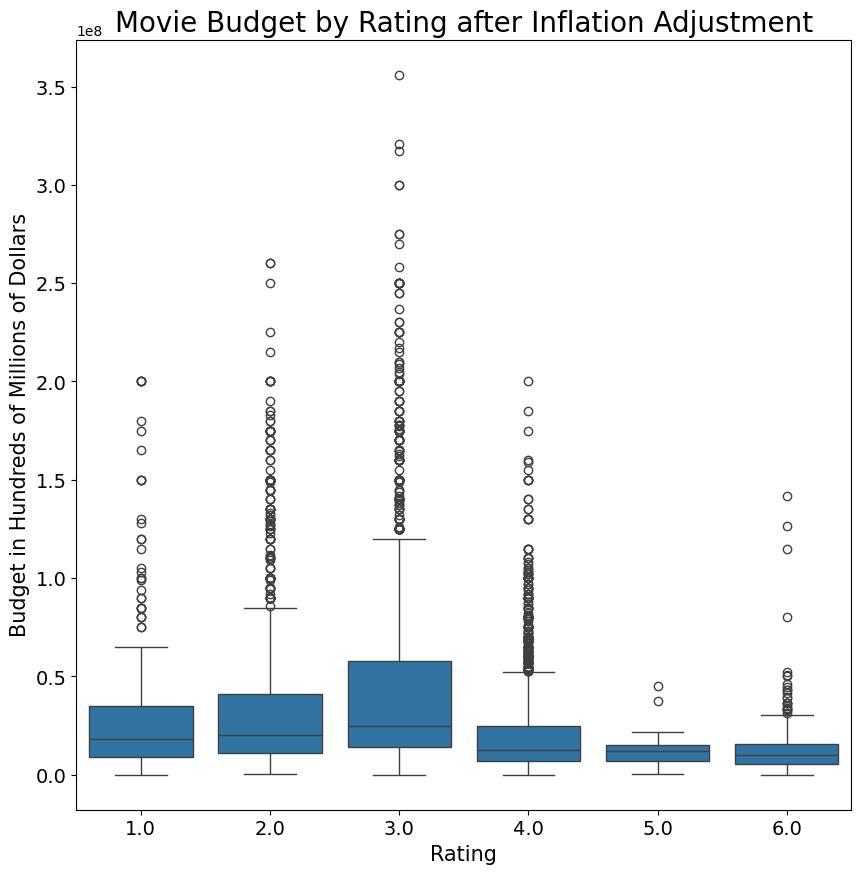

In [56]:
df_sorted = df.sort_values(by = 'rating')

plt.figure(figsize = (10,10))
sns.boxplot(data = df_sorted, x = 'rating', y = 'budget')

plt.xlabel('Rating', fontsize = 15)
plt.ylabel('Budget in Hundreds of Millions of Dollars', fontsize = 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Movie Budget by Rating after Inflation Adjustment', fontsize = 20)

plt.savefig('./Images/movie_budget_by_rating_after_inflation_adj.png', dpi = 192)

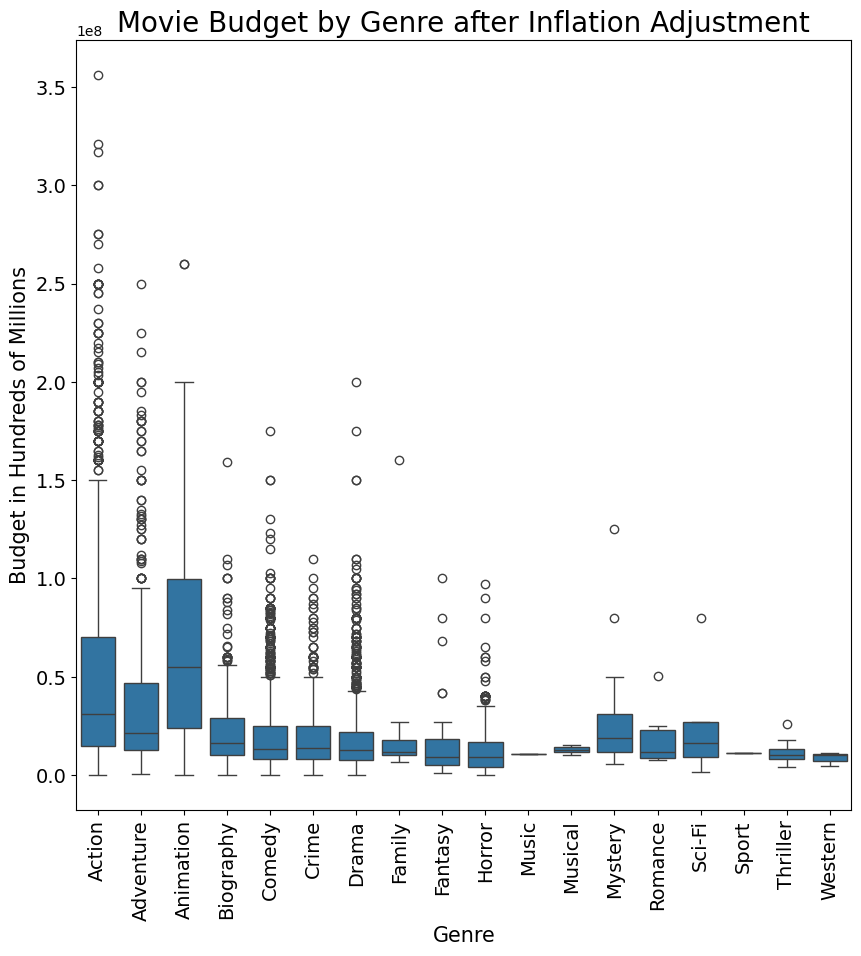

In [57]:
genre_sort = df.sort_values(by = 'genre')

plt.figure(figsize = (10,10))
sns.boxplot(data = genre_sort, x = 'genre', y = 'budget')

plt.xlabel('Genre', fontsize = 15)
plt.ylabel('Budget in Hundreds of Millions', fontsize = 15)
plt.xticks(fontsize = 14, rotation = 90)
plt.yticks(fontsize = 14)
plt.title('Movie Budget by Genre after Inflation Adjustment', fontsize = 20)

plt.savefig('./Images/movie_budget_by_genre_after_inflation_adjustment.png', dpi = 192);